<a href="https://colab.research.google.com/github/magjanvaz/curso-python-us/blob/main/notebooks/numpy/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios 

In [ ]:
import numpy as np 

---
## Convoluciones de arrays

:::{exercise}
:label: chapther2-convolution

Dadas dos funciones de variable real $f$ y $g$, definimos la [**convolución**](https://en.wikipedia.org/wiki/Convolution) de $f$ y $g$ como

$$
(f*g)(x) = \int_\mathbb{R} f(t)g(x - t)dt.
$$

La versión discreta de la anterior definición puede ser la siguiente. Datos $f=(f_0, \dots, f_{n-1})$ y $g=(g_0, \dots, g_{m-1})$ dos vectores (representados por arrays unidimensionales) de tamaño $n$ y $m$, respectivamente, definimos el array `conv` de dimensión `n + m - 1` cuya componente $k$ vale 

$$
\sum_{i + m -1 = k + j}f_ig_j
$$

para $0 \leq k \leq n + m - 1$. 

Crea una función `conv` que tome como inputs dos arrays y devuelva la convolución de ambos. Por ejemplo 

```
arr1 = np.arange(10)
arr2 = np.arange(5) 
conv(arr1, arr2)
>>> [ 0  4 11 20 30 40 50 60 70 80 50 26  9  0]
```

:::

:::{solution} chapther2-convolution
:class: dropdown

Una primera solución iterando sobre todos las posibles combinaciones de $i$ y $j$ para cada $k$
```
from itertools import product

def conv(f, g):
    n = f.shape[0]
    m = g.shape[0]
    conv_dim = n + m - 1
    arr_conv = np.zeros(conv_dim, dtype=f.dtype)
    for k in range(conv_dim):
        my_gen = (
            f[i]*g[j] for i, j in product(range(n), range(m)) \
                if i + m - 1 == j + k
        )
        arr_conv[k] = sum(my_gen)
    return arr_conv
```

Otra solución más directa considerando la matrix *producto exterior* de $f$ y $g$ y sumando las diagonales 

```
def conv2(f, g):
    i = f.shape[0]
    j = g.shape[0]
    outer_mat = np.outer(f, g).T
    c = np.array([np.trace(outer_mat, offset=k) for k in range(-j + 1, i)])
    return c
```

:::


---
## Procesando imágenes con numpy

:::{exercise}
:label: chapther2-images

Una de las posibles técnicas que existen para comprimir una imagen es utilizar [la descomposición SVD (Singular Value Decomposition)](https://en.wikipedia.org/wiki/Singular_value_decomposition) que nos permite expresar una matrix $A$ de dimensiones $n\times m$ como un producto

$$ 
A = U \Sigma V^t
$$

donde $U$ y $V$ son cuadradas de dimensiones $n$ y $m$ respectivamente y $\Sigma$ es diagonal y está formada por los [valores singulares](https://en.wikipedia.org/wiki/Singular_value) de $A$ ordenados de mayor a menor (siempre son números reales y positivos). 

Recuerda que una imagen no es más que un conjunto de 3 matrices, cada una representando la intensidad de la grilla de píxeles para cada color (rojo, verde y azul). Una forma de comprimir una imagen consiste en quedarse con los $k$ primeros valores singulares para cada color e intercambiar $k$ por una se las dimensiones que representan el alto o el ancho de la imagen. 

Crea una función `aproxima_img` que tome un array de dimensión $(3, h, w)$ y devuelva otra imagen aproximada de dimensión $(3, h, w)$ utilizando los k primeros valores singulares. Para ello, 
1. Utiliza la función `scipy.misc.face` para generar una imagen de prueba, o también puedes importar una utilizando `im = cv2.imread("img.jpg")`. Puedes visualizar imágenes con este formato a través del la función `imshow` de `matplotlib.pyplot` (a veces hay que cambiar de orden los canales).
2. Utiliza la función `svd` de `np.linalg` para realizar la descomposición SVD. Mucho cuidado con las dimensiones que espera la función. 
3. Otras funciones que pueden ser útiles para el ejercicio: `np.transpose`, `np.zeros`, `np.fill_diagonal`, `np.clip`.

:::

In [ ]:
import numpy as np
from scipy.misc import face
import matplotlib.pyplot as plt

im=face()

In [ ]:
type(im), im.shape # tiene la dimensión correcta

(numpy.ndarray, (768, 1024, 3))

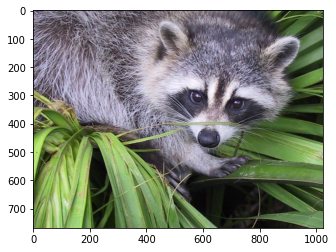

In [ ]:
plt.imshow(im)

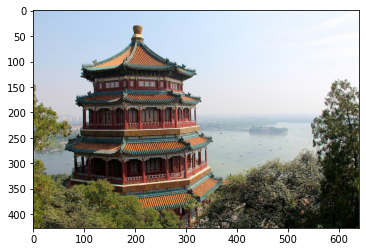

In [ ]:
from sklearn.datasets import load_sample_images
data = load_sample_images()
plt.imshow(data.images[0])

In [ ]:
# plt.imshow(imagen[:,:,[0,2,1]])
# esto es por si tenemos una imagen leída con cs2 y no tiene correctamente
# el orden RGB, vamos permutando 021 hasta obtener la combinación correcta

In [ ]:
U, S, Vt = np.linalg.svd(im)

In [ ]:
U.shape, S.shape, Vt.shape # vemos que tienen distintas
# miramos la documentación de la función
# y averiguamos que deberíamos itroducirla con un cambio

((768, 1024, 1024), (768, 3), (768, 3, 3))

In [ ]:
im_t = np.transpose(im,(2,0,1))

In [ ]:
U, S, Vt = np.linalg.svd(im_t)

In [ ]:
U.shape, S.shape, Vt.shape

((3, 768, 768), (3, 768), (3, 1024, 1024))

Ahora queremos una matriz que tenga dimension 768x1024
y que tenga los k primeros elementos de S en su diagonal

In [ ]:
def aproxima_img(im,k):
  im_t = np.transpose(im, (2,0,1))
  h = im.shape[0]
  w = im.shape[1]
  U, s, Vt = np.linalg.svd(im_t)
  S = np.zeros((3,h,w))
  for canal in range(3):
    np.fill_diagonal(S[canal,:,:],s[canal,:])
  im_c = U @ S[:,:,:k] @ Vt[:,:k,:]
  im_c = im_c/im_c.max()
  return im_c

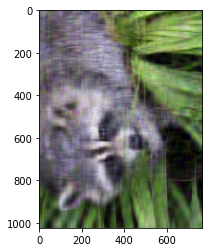

In [ ]:
im_c = aproxima_img(im,k=15)
im_c_t = np.transpose(im_c,(2,1,0))
plt.imshow(im_c_t) # vemos que está algo borroso

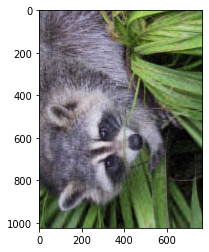

In [ ]:
im_c = aproxima_img(im,k=40)
im_c_t = np.transpose(im_c,(2,1,0))
plt.imshow(im_c_t) # de esta forma ya sale bien la imagen

:::{exercise}
:label: chapter2-images-convolution

Importa una imagen de tu elección utilizando la función `imread` de la librería `cv2`. Crea un array `kernel` de dimensión $(n, n)$ y realiza la convolución de tu imagen con `kernel` mediante la función [`scipy.signal.convolve2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html#scipy.signal.convolve2d) (parámetro `mode='same'`). Si tu imagen tiene varios canales para los colores, aplica el mismo kernel a cada canal.

Algunos ejemplos interesantes de kernel pueden ser los siguientes:

- $n = 3$ con valores 

$$
\begin{pmatrix}
-3 & 0 & 3\\
-10 & 0 & 10\\
-3 & 0 & 3
\end{pmatrix} 
$$

- transpuesta del anterior, 

$$
\begin{pmatrix}
-3 & -10 & -3\\
0 & 0 & 0\\
3 & 10 & 3
\end{pmatrix} 
$$

- $n \approx 50$, generados con `scipy.signal.windows.gaussian` (puedes utilizar la función `np.outer` para realizar un producto exterior)

- Operador complejo de Sharr
```
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],

                   [-10+0j, 0+ 0j, +10 +0j],

                   [ -3+3j, 0+10j,  +3 +3j]])
```
Puedes visualizar las imágenes con `matplotlib.pyplot.imshow`.

:::

In [1]:
import cv2
from scipy import signal

In [7]:
# Importamos la imagen utilizando imread
# img = cv2.imread("ruta a nuestra imagen")

In [9]:
import matplotlib.pyplot as plt
# plt.imshow(img[:,:,(2,1,0)])

In [6]:
import numpy as np
kernel = np.array(
    [
        [-3,0,3],
        [-10,0,10],
        [-3,0,3]
    ]
)

In [14]:
import scipy
v_norm = scipy.signal.windows.gaussian(50, std=1)
kernel_g = np.outer(v_norm, v_norm)

---
## Regresión Lineal

:::{exercise}
:label: chapter2-linear-regression

Considera un modelo de regresión lineal que consiste en estimar una variable $y$ como una suma ponderada de un cojunto de variables regresoras 

$$
\hat{y} = \theta_0 + \theta_1x_1 + \dots \theta_nx_n
$$

donde 

- $n$ es el conjunto de variables regresoras o *features*, $x_i$ el valor correspondiente.
- $\hat{y}$ es el valor predicho. 
- $\theta_i$ son parámetros del modelo para $0 \leq i \leq n$.  

Podemos expresar dicha ecuación en formato matricial como

$$
\hat{y} = 
\begin{pmatrix}
1 & x_1 & \cdots & x_n
\end{pmatrix} 
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{pmatrix} 
=
\boldsymbol{x} \cdot \boldsymbol{\theta}.
$$

Dado un conjunto de $m$ observaciones, nuestro objetivo es encontrar $\boldsymbol{\theta}$ tal que se minimice nuestra aproximación lineal en términos de menores cuadrados 

$$
\frac{1}{m}\sum_{i=1}^{m} 
(\boldsymbol{x}_i \cdot \boldsymbol{\theta} - y_i)^2.
$$

El valor óptimo de los parámetros se puede calcular directamente 

$$
\hat{\theta} = (\boldsymbol{X}^t\boldsymbol{X})^{-1}\boldsymbol{X}^ty
$$

donde 

$$
\boldsymbol{X} = 
\begin{pmatrix}
1 & x_{11} & \cdots & x_{1n} \\
1 & x_{21} & \cdots & x_{2n} \\
\vdots & \vdots & \cdots & \vdots \\
1 & x_{m1} & \cdots & x_{mn} 
\end{pmatrix}
$$

es el conjunto de observaciones de las variables regresoras e

$$
\hat{y}=
\begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{pmatrix}
$$

es el conjunto de observaciones de la variable objetivo.


Crea una clase `RegresionLineal` con dos métodos, 
- `entrena`: toma como parámetros `X` e `y`, observaciones de las variables regresoras y objetivo, respectivamente, y calcula los coeficientes de la regresión lineal y los guarda en un atributo `_theta`. 
- `transforma`: toma como parámetro una serie de observaciones nuevas `X` y devuelve una estimación `y_hat` de la varible objetivo utilizando el método descrito anteriormente. 

Funciones que puede ser de ayuda: `np.linalg.inv`, `np.linalg.pinv`, `np.vstack`, `np.hstack`.

:::

In [ ]:
rng = np.random.default_rng()
n=20
m=300
x_test = rng.standard_normal((m,n))
theta_test = rng.integers(10,size=n) # n números enteros hasta 10
y_test = 4 + 3*x_test @ theta_test

In [ ]:
y_test.shape, x_test.shape

((300,), (300, 20))

In [ ]:
class RegresionLineal:
  def entrena(self,x,y):
    # primero necesitamos la columna de unos para x
    ones = np.ones((x.shape[0],1))
    x_b = np.hstack((ones,x))
    self._theta = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y
  def transforma(self,x):
    ones = np.ones((x.shape[0],1))
    x_b = np.hstack((ones,x))
    y_hat = x_b @ self._theta
    return y_hat

In [ ]:
regresion_lineal = RegresionLineal()

In [ ]:
regresion_lineal.entrena(x_test,y_test)
regresion_lineal._theta

(array([ 4.00000000e+00,  2.70000000e+01,  6.00000000e+00,  2.40000000e+01,
         6.00000000e+00,  1.83186799e-15,  1.50000000e+01,  2.10000000e+01,
         6.00000000e+00,  2.70000000e+01,  3.00000000e+00,  9.00000000e+00,
        -1.33226763e-15,  2.40000000e+01,  2.40000000e+01,  1.80000000e+01,
         6.00000000e+00,  6.00000000e+00,  2.40000000e+01,  6.00000000e+00,
         1.50000000e+01]),
 array([27,  6, 24,  6,  0, 15, 21,  6, 27,  3,  9,  0, 24, 24, 18,  6,  6,
        24,  6, 15]))

In [ ]:
regresion_lineal.transforma(x_test)

array([ 146.63639019,  -94.4250363 ,   32.59925632,   62.08169929,
        121.12182898,  -16.64694265,   36.15727324,   -7.93666485,
        -40.46534318,  -83.7785701 ,  -30.03184245,  -79.02141117,
         62.31881677,   -7.25252499,  -86.07867736, -138.21001579,
         35.10846604,   27.30960881,   30.13066009, -138.15991969,
        -19.67010071,   78.86497169,   12.78557163,  -16.6791667 ,
         40.1283913 ,   79.26787321,   26.41851393,  -63.38727572,
         21.25679139,   80.02476615,  -85.7837813 ,   75.2958992 ,
        -93.52688538,   89.30613119,  192.06240818,   21.18799319,
         55.63372922,   61.03632747,   57.45025933,   31.07966852,
        -50.26332197,   14.62654706,   20.76504574,  113.13415241,
        -20.05278249,  -38.61774248,  -45.63792548,    3.82503539,
         14.36017067,    6.42196201,  -50.17482785,  -89.79931642,
         56.65775583,  -55.72931841,  101.38811425,   12.75340557,
        -75.14444524,   64.78349073,   46.88109348,  -15.95930